<AxesSubplot:>

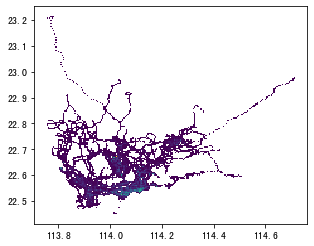

In [8]:
import plot_map
import pandas as pd
#读取数据    
data = pd.read_csv('TaxiData-Sample.csv',header = None) 
data.columns = ['VehicleNum','Stime','Lng','Lat','OpenStatus','Speed']      
#定义范围
bounds = [113.75194,22.447837,114.624187,22.864748]
#获取栅格化参数
params = plot_map.grid_params(bounds,accuracy = 500)
#将GPS栅格化
data['LONCOL'],data['LATCOL'] = plot_map.GPS_to_grids(data['Lng'],data['Lat'],params)
data = data[(data['LONCOL']>0)&(data['LATCOL']>0)]
#集计栅格数据量
datatest = data.groupby(['LONCOL','LATCOL'])['VehicleNum'].count().reset_index()
#生成栅格地理图形
datatest['geometry'] = plot_map.gridid_to_polygon(datatest['LONCOL'],datatest['LATCOL'],params)
#转为GeoDataFrame
import geopandas as gpd
datatest = gpd.GeoDataFrame(datatest)
#绘制
datatest.plot(column = 'VehicleNum')